In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Our first step is to get the training data from the titanic dataset in a variable named "train_data" using read_csv**

In [18]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Then we must explore the data using describe,info**

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Have to find the null values which present in the dataset**

In [21]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**we have to search for the missing value by finding a pattern like Ms,Mr,Miss,etc and fill them with the mean value**

In [22]:
import re
import pandas as pd

for j, name in enumerate(train_data['Name']):
    if re.search(r'Mr\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 32.368090452261306
    elif re.search(r'Mrs\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 35.898148148148145
    elif re.search(r'Dr\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 42
    elif re.search(r'Master\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 4.574166666666667
    elif re.search(r'Miss\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 21.773972602739725


**Checking the training data using the .head() function**

In [23]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C


**Display the columns and display if there are any null values**

In [24]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Dropping the Cabin column since it contains many missing values**

In [26]:
train_data=train_data.drop('Cabin',axis=1)

In [27]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


**Checking the missing value in embarked column**

In [28]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


**Replacing the missing value with mean**

In [29]:
if train_data['Embarked'].isna().any():
    train_data['Embarked'].fillna('mean',inplace=True)


In [30]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Dropping the columns which are unnecessary to the target column**

In [31]:
train_data=train_data.drop(['Ticket','Name'],axis=1)

In [32]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [33]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,21.773973,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


**Encoding the columns which has categorical variables**

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop=None, sparse=False)
encoded_sex = ohe.fit_transform(train_data[['Sex']])
train_data['Sex'] = encoded_sex
encoded_embarked=ohe.fit_transform(train_data[['Embarked']])
train_data['Embarked']=encoded_embarked

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0.0,22.000000,1,0,7.2500,0.0
1,2,1,1,1.0,38.000000,1,0,71.2833,1.0
2,3,1,3,1.0,26.000000,0,0,7.9250,0.0
3,4,1,1,1.0,35.000000,1,0,53.1000,0.0
4,5,0,3,0.0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.0,27.000000,0,0,13.0000,0.0
887,888,1,1,1.0,19.000000,0,0,30.0000,0.0
888,889,0,3,1.0,21.773973,1,2,23.4500,0.0
889,890,1,1,0.0,26.000000,0,0,30.0000,1.0


**Feature construction with parch and sibsp**

In [36]:
train_data['Family']=train_data['Parch']+train_data['SibSp']

**Removing the columns from which we have created the family column**

In [37]:
train_data=train_data.drop(['SibSp','Parch'],axis=1)

In [38]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,0.0,22.000000,7.2500,0.0,1
1,2,1,1,1.0,38.000000,71.2833,1.0,1
2,3,1,3,1.0,26.000000,7.9250,0.0,0
3,4,1,1,1.0,35.000000,53.1000,0.0,1
4,5,0,3,0.0,35.000000,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0.0,27.000000,13.0000,0.0,0
887,888,1,1,1.0,19.000000,30.0000,0.0,0
888,889,0,3,1.0,21.773973,23.4500,0.0,3
889,890,1,1,0.0,26.000000,30.0000,1.0,0


**Finding the correlation between the columns through heatmap**

<Axes: >

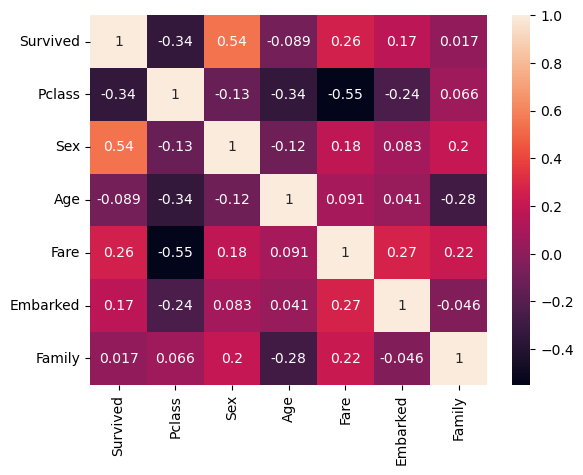

In [39]:
import seaborn as sns
sns.heatmap(train_data.drop('PassengerId',axis=1).corr(),annot=True)


**Checking the datatype of every columns using info()**

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    float64
 7   Family       891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [41]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,0.0,22.000000,7.2500,0.0,1
1,2,1,1,1.0,38.000000,71.2833,1.0,1
2,3,1,3,1.0,26.000000,7.9250,0.0,0
3,4,1,1,1.0,35.000000,53.1000,0.0,1
4,5,0,3,0.0,35.000000,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0.0,27.000000,13.0000,0.0,0
887,888,1,1,1.0,19.000000,30.0000,0.0,0
888,889,0,3,1.0,21.773973,23.4500,0.0,3
889,890,1,1,0.0,26.000000,30.0000,1.0,0


**Reading the test data using read_csv**

In [42]:
test_data= pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**checking the null values in test data**

In [43]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Filling the missing age column with the same values of training data**

In [44]:
import re
import pandas as pd

for j, name in enumerate(test_data['Name']):
    if re.search(r'Mr\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 32.368090452261306
    elif re.search(r'Mrs\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 35.898148148148145
    elif re.search(r'Dr\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 42
    elif re.search(r'Master\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 4.574166666666667
    elif re.search(r'Miss\.', str(name)) or re.search(r'Ms\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 21.773972602739725


**Checking for the null values**

In [45]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Filling the fare column with mean value**

In [46]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

**checking for the null values**

In [47]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

**Dropping the name,ticket columns**

In [48]:
test_data=test_data.drop(['Name','Ticket'],axis=1)

In [49]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.500000,0,0,7.8292,NaN,Q
1,893,3,female,47.000000,1,0,7.0000,NaN,S
2,894,2,male,62.000000,0,0,9.6875,NaN,Q
3,895,3,male,27.000000,0,0,8.6625,NaN,S
4,896,3,female,22.000000,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.368090,0,0,8.0500,NaN,S
414,1306,1,female,39.000000,0,0,108.9000,C105,C
415,1307,3,male,38.500000,0,0,7.2500,NaN,S
416,1308,3,male,32.368090,0,0,8.0500,NaN,S


**Encoding the sex and embarked column with OneHotEncoder()**

In [50]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop=None, sparse=False)
encoded_sex = ohe.fit_transform(test_data[['Sex']])
test_data['Sex'] = encoded_sex
encoded_embarked=ohe.fit_transform(test_data[['Embarked']])
test_data['Embarked']=encoded_embarked

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0.0,34.500000,0,0,7.8292,NaN,0.0
1,893,3,1.0,47.000000,1,0,7.0000,NaN,0.0
2,894,2,0.0,62.000000,0,0,9.6875,NaN,0.0
3,895,3,0.0,27.000000,0,0,8.6625,NaN,0.0
4,896,3,1.0,22.000000,1,1,12.2875,NaN,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,32.368090,0,0,8.0500,NaN,0.0
414,1306,1,1.0,39.000000,0,0,108.9000,C105,1.0
415,1307,3,0.0,38.500000,0,0,7.2500,NaN,0.0
416,1308,3,0.0,32.368090,0,0,8.0500,NaN,0.0


In [52]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

**Dropping the Cabin column**

In [53]:
test_data=test_data.drop('Cabin',axis=1)

In [54]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0.0,34.500000,0,0,7.8292,0.0
1,893,3,1.0,47.000000,1,0,7.0000,0.0
2,894,2,0.0,62.000000,0,0,9.6875,0.0
3,895,3,0.0,27.000000,0,0,8.6625,0.0
4,896,3,1.0,22.000000,1,1,12.2875,0.0
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,32.368090,0,0,8.0500,0.0
414,1306,1,1.0,39.000000,0,0,108.9000,1.0
415,1307,3,0.0,38.500000,0,0,7.2500,0.0
416,1308,3,0.0,32.368090,0,0,8.0500,0.0


**creating new column with the existing columns**

In [55]:
test_data['Family']=test_data['Parch']+test_data['SibSp']

In [56]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,0.0,34.500000,0,0,7.8292,0.0,0
1,893,3,1.0,47.000000,1,0,7.0000,0.0,1
2,894,2,0.0,62.000000,0,0,9.6875,0.0,0
3,895,3,0.0,27.000000,0,0,8.6625,0.0,0
4,896,3,1.0,22.000000,1,1,12.2875,0.0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,32.368090,0,0,8.0500,0.0,0
414,1306,1,1.0,39.000000,0,0,108.9000,1.0,0
415,1307,3,0.0,38.500000,0,0,7.2500,0.0,0
416,1308,3,0.0,32.368090,0,0,8.0500,0.0,0


**splitting the x and y variables**

In [57]:
x=train_data.drop(['Survived'],axis=1)
y=train_data['Survived']

**splitting the training and testing data set using train_test_split**

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

**Importing library for cross validation**

In [59]:
from sklearn.model_selection import cross_val_score,KFold

In [60]:
x_train

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
298,299,1,0.0,32.36809,30.5000,0.0,0
884,885,3,0.0,25.00000,7.0500,0.0,0
247,248,2,1.0,24.00000,14.5000,0.0,2
478,479,3,0.0,22.00000,7.5208,0.0,0
305,306,1,0.0,0.92000,151.5500,0.0,3
...,...,...,...,...,...,...,...
106,107,3,1.0,21.00000,7.6500,0.0,0
270,271,1,0.0,32.36809,31.0000,0.0,0
860,861,3,0.0,41.00000,14.1083,0.0,2
435,436,1,1.0,14.00000,120.0000,0.0,3


**XGBCLASSIFIER AND CROSS VALIDATION**

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create an instance of XGBoost classifier
model = XGBClassifier(learning_rate=0.10184977839317343, max_depth=5, n_estimators=149)

# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=5)
print("Average Cross Validation score of XGB: {}".format(scores.mean()))

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Calculate the accuracy of the model
accuracy_xgb = accuracy_score(y_test, predictions)
print("Accuracy of XGBoost:", accuracy_xgb)

Average Cross Validation score of XGB: 0.7949051733812141
Accuracy of XGBoost: 0.820627802690583


**ADABOOST CLASSIFIER USING GRID SEARCH CV**

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=AdaBoostClassifier(base_estimator= RandomForestClassifier(),
 learning_rate= 0.1,
n_estimators= 50,
 random_state= 42)
model.fit(x_train, y_train)
resultt=model.predict(x_test)
accuracyy_adab=accuracy_score(y_test,resultt)
print("Accuracy of gb:",accuracyy_adab)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of gb: 0.8340807174887892


**GRADIENTBOOSTING CLASSIFIER AND CROSS VALIDATION**

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

best_params = {'learning_rate': 0.10184977839317343, 'max_depth': 5, 'n_estimators': 149}
clf = GradientBoostingClassifier(**best_params)
score1=cross_val_score(clf,x_train,y_train,cv=5)
print("Average Cross Validation score :{}".format(score1.mean()))
clf.fit(x_train, y_train)
y_predgb= clf.predict(x_test)
accuracyygb=accuracy_score(y_test,y_predgb)
print("Accuracy of gb:",accuracyygb)

Average Cross Validation score :0.8024127482886321
Accuracy of gb: 0.8475336322869955


**KNEIGHBORS CLASSIFIER USING GRID SEARCH CV**

In [64]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 35, 45, 8]
}

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(x_train, y_train)  # Assuming you have X_train and y_train defined

df1= pd.DataFrame(grid.cv_results_)
print(df1)
print("Best parameters:",grid.best_params_)
print("Best score:",grid.best_score_)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002917      0.000560         0.008086        0.000840   
1        0.002612      0.000067         0.003170        0.000098   
2        0.002633      0.000128         0.007693        0.000076   
3        0.002629      0.000039         0.003242        0.000092   
4        0.002620      0.000150         0.007663        0.000159   
..            ...           ...              ...             ...   
59       0.002264      0.000086         0.003613        0.000094   
60       0.002375      0.000103         0.008779        0.000096   
61       0.002325      0.000075         0.003547        0.000121   
62       0.002331      0.000093         0.008543        0.000108   
63       0.002332      0.000086         0.003665        0.000069   

   param_algorithm param_leaf_size param_n_neighbors param_weights  \
0             auto              30                 5       uniform   
1             auto              30         

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(algorithm= 'auto',leaf_size= 30, n_neighbors= 7, weights= 'uniform')
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test) 
accuracyy=accuracy_score(y_test,y_pred)
print("Accuracy of KNN:",accuracyy)
score4=cross_val_score(knn,x_train,y_train,cv=5)
print("Average Cross Validation score of KNN:{}".format(score4.mean()))

Accuracy of KNN: 0.6591928251121076
Average Cross Validation score of KNN:0.630164964650432


**LOGISTIC REGRESSION USING GRIDSEARCH CV**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd

params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [100, 150, 200]
}

grid2 = GridSearchCV(LogisticRegression(), params, cv=5)
grid2.fit(x_train, y_train)  # Assuming you have x_train and y_train defined

df2 = pd.DataFrame(grid2.cv_results_)
print(df2)
print("Best parameters:", grid2.best_params_)
print("Best score:", grid2.best_score_)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.000841      0.000067         0.000000        0.000000   
1         0.004986      0.000277         0.002088        0.000102   
2         0.000714      0.000022         0.000000        0.000000   
3         0.000705      0.000031         0.000000        0.000000   
4         0.000695      0.000022         0.000000        0.000000   
..             ...           ...              ...             ...   
211       0.002170      0.000076         0.000000        0.000000   
212       0.049021      0.002548         0.002471        0.000082   
213       0.002166      0.000077         0.000000        0.000000   
214       0.030141      0.000850         0.002237        0.000124   
215       0.030354      0.000690         0.002347        0.000238   

    param_max_iter param_multi_class param_penalty     param_solver  \
0              100              auto            l1            lbfgs   
1              100           

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
555 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the followi

In [67]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter= 200, multi_class= 'ovr', penalty= 'l1', solver= 'liblinear')
lr.fit(x_train,y_train)
y_pred1= lr.predict(x_test)
accuracyy1=accuracy_score(y_test,y_pred1)
print("Accuracy of lr:",accuracyy1)

Accuracy of lr: 0.7937219730941704


**DECISION TREE CLASSIFIER USING GRID SEARCH CV**

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd

params = {
    'criterion':['gini', 'entropy', 'log_loss'],
                  'splitter':['best', 'random'],
                  'max_features':['auto', 'sqrt', 'log2']}

grid3 = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid3.fit(x_train, y_train)  # Assuming you have x_train and y_train defined

df3 = pd.DataFrame(grid3.cv_results_)
print(df3)
print("Best parameters:", grid3.best_params_)
print("Best score:", grid3.best_score_)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003197      0.000424         0.002044        0.000102   
1        0.002503      0.000084         0.001922        0.000043   
2        0.002833      0.000060         0.001914        0.000054   
3        0.002524      0.000110         0.001848        0.000063   
4        0.002768      0.000087         0.001882        0.000045   
5        0.002445      0.000110         0.001831        0.000123   
6        0.003038      0.000112         0.001931        0.000093   
7        0.002621      0.000074         0.001835        0.000039   
8        0.003038      0.000101         0.001900        0.000099   
9        0.002519      0.000065         0.001826        0.000050   
10       0.002882      0.000064         0.001900        0.000068   
11       0.002527      0.000081         0.001928        0.000102   
12       0.002846      0.000197         0.001951        0.000205   
13       0.002592      0.000111         0.001881

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier(criterion= 'gini', max_features= 'auto', splitter= 'best')
dt.fit(x_train,y_train)
y_pred2= dt.predict(x_test)
accuracyy2=accuracy_score(y_test,y_pred2)
print("Accuracy of DecisionTree:",accuracyy2)

Accuracy of DecisionTree: 0.8026905829596412


**RANDOM FOREST CLASSIFIER USING GRID SEARCH CV**

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['sqrt', 'log2', None],
            'class_weight': ['balanced', 'balanced_subsample']
        }

grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(x_train, y_train)  # Assuming you have X_train and y_train defined

df1= pd.DataFrame(grid.cv_results_)
print(df1)
print("Best parameters:",grid.best_params_)
print("Best score:",grid.best_score_)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.248627      0.002344         0.015798        0.001123   
1        0.247274      0.004209         0.015219        0.000266   
2        0.304571      0.010084         0.015645        0.001053   
3        0.263569      0.004464         0.015372        0.000418   
4        0.263768      0.002913         0.015762        0.000135   
5        0.327000      0.002557         0.015210        0.000462   
6        0.260351      0.001793         0.015703        0.000262   
7        0.258640      0.001740         0.014958        0.000360   
8        0.324619      0.001986         0.015167        0.000211   
9        0.312527      0.009047         0.015441        0.000166   
10       0.311238      0.001569         0.015450        0.000255   
11       0.353338      0.002238         0.014870        0.000531   
12       0.315389      0.003099         0.015473        0.000933   
13       0.319059      0.002315         0.014764

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(class_weight= 'balanced_subsample',criterion= 'log_loss', max_features= 'sqrt')
rfc.fit(x_train,y_train)
y_pred3= rfc.predict(x_test)
accuracyy3=accuracy_score(y_test,y_pred3)
print("Accuracy of RandomForest:",accuracyy3)
score3=cross_val_score(rfc,x_train,y_train,cv=5)
print("Average Cross Validation score :{}".format(score3.mean()))

Accuracy of RandomForest: 0.820627802690583
Average Cross Validation score :0.8144316013915385


**GAUSSIAN NAIVE BAYES AND CROSS VALIDATION**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred4= gnb.predict(x_test)
accuracyy4=accuracy_score(y_test,y_pred4)
print("Accuracy of GaussianNB:",accuracyy4)
score2=cross_val_score(gnb,x_train,y_train,cv=5)
print("Average Cross Validation score :{}".format(score2.mean()))

Accuracy of GaussianNB: 0.7892376681614349
Average Cross Validation score :0.7918527662439682


**SUPPORT VECTOR CLASSIFIER AND CROSS VALIDATION SCORE**

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
y_pred5= svc.predict(x_test)
accuracyy5=accuracy_score(y_test,y_pred5)
print("Accuracy of GaussianNB:",accuracyy5)
score7=cross_val_score(svc,x_train,y_train,cv=5)
print("Average Cross Validation score :{}".format(score7.mean()))

Accuracy of GaussianNB: 0.6188340807174888
Average Cross Validation score :0.6481651890921333


**INSTALLING CATBOOST FOR CATBOOST CLASSIFIER**

In [74]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


**INSTALLING OPTUNA FOR HYPER PARAMETER TUNING**

In [75]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


**CATBOOST ALGORITHM**

In [76]:
from catboost import CatBoostClassifier
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}
model = CatBoostClassifier(**params)
model.fit(x_train, y_train)
y_pred6 = model.predict(x_test)
accuracyy6=accuracy_score(y_test,y_pred6)
print("Accuracy of CatBoost:",accuracyy6)

0:	learn: 0.6576741	total: 54.4ms	remaining: 5.38s
1:	learn: 0.6255881	total: 55.7ms	remaining: 2.73s
2:	learn: 0.5989195	total: 56.4ms	remaining: 1.82s
3:	learn: 0.5771596	total: 57.1ms	remaining: 1.37s
4:	learn: 0.5614534	total: 57.5ms	remaining: 1.09s
5:	learn: 0.5426808	total: 58ms	remaining: 909ms
6:	learn: 0.5284346	total: 58.8ms	remaining: 782ms
7:	learn: 0.5150233	total: 59.5ms	remaining: 684ms
8:	learn: 0.5010981	total: 60.1ms	remaining: 607ms
9:	learn: 0.4905425	total: 60.4ms	remaining: 543ms
10:	learn: 0.4804131	total: 60.9ms	remaining: 493ms
11:	learn: 0.4715890	total: 61.6ms	remaining: 452ms
12:	learn: 0.4626759	total: 62.2ms	remaining: 416ms
13:	learn: 0.4557561	total: 62.8ms	remaining: 386ms
14:	learn: 0.4499967	total: 63ms	remaining: 357ms
15:	learn: 0.4435703	total: 63.6ms	remaining: 334ms
16:	learn: 0.4378874	total: 64.2ms	remaining: 313ms
17:	learn: 0.4325824	total: 64.8ms	remaining: 295ms
18:	learn: 0.4285719	total: 65.4ms	remaining: 279ms
19:	learn: 0.4243099	total

**INSTALLING XGBOOST**

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**XGBOOST CLASSIFIER ALGORITHM USING OPTUNA**

In [78]:
import optuna
import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

def objective(trial):
    clf = XGBClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 1000),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        learning_rate=trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        subsample=trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.1),
        colsample_bytree=trial.suggest_discrete_uniform('colsample_bytree', 0.6, 1.0, 0.1),
        reg_lambda=trial.suggest_loguniform('reg_lambda', 1e-4, 1e2)
    )

    return cross_val_score(clf, x, y, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


[I 2023-07-16 18:01:24,230] A new study created in memory with name: no-name-bef2a1d8-cdcd-411b-a1a4-1b61f9b44cf8
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[I 2023-07-16 18:01:26,409] Trial 0 finished with value: 0.8013468013468014 and parameters: {'n_estimators': 549, 'max_depth': 6, 'learn

Accuracy: 0.8260381593714928
Best hyperparameters: {'n_estimators': 767, 'max_depth': 3, 'learning_rate': 0.012574204434542218, 'subsample': 0.7, 'colsample_bytree': 1.0, 'reg_lambda': 28.21365783721326}


In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(
    n_estimators=223,
    max_depth=8,
    learning_rate=0.061476061549861766,
    subsample=0.7,
    colsample_bytree=0.6,
    reg_lambda=0.01264043320088703
)

model.fit(x_train, y_train)
y_pred7 = model.predict(x_test)
accuracyy7 = accuracy_score(y_test, y_pred7)
print("Accuracy of XGBoost:", accuracyy7)


Accuracy of XGBoost: 0.8251121076233184


**CATBOOST CLASSIFIER USING OPTUNA**

In [ ]:
import optuna
import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

def objective(trial):
    clf = CatBoostClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 1000),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        learning_rate=trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        subsample=trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.1),
        colsample_bylevel=trial.suggest_discrete_uniform('colsample_bylevel', 0.6, 1.0, 0.1),
        reg_lambda=trial.suggest_loguniform('reg_lambda', 1e-4, 1e2)
    )

    return cross_val_score(clf, x, y, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


[I 2023-07-16 18:02:24,191] A new study created in memory with name: no-name-0282b8eb-07f2-4405-bfd3-905604934853


0:	learn: 0.6428318	total: 48.1ms	remaining: 46.4s
1:	learn: 0.6031070	total: 50.3ms	remaining: 24.2s
2:	learn: 0.5598684	total: 52.3ms	remaining: 16.8s
3:	learn: 0.5411128	total: 53.8ms	remaining: 12.9s
4:	learn: 0.5259647	total: 54.4ms	remaining: 10.5s
5:	learn: 0.5010589	total: 58ms	remaining: 9.28s
6:	learn: 0.4761325	total: 60.5ms	remaining: 8.28s
7:	learn: 0.4666569	total: 61.3ms	remaining: 7.34s
8:	learn: 0.4449323	total: 65.5ms	remaining: 6.96s
9:	learn: 0.4265778	total: 67.7ms	remaining: 6.47s
10:	learn: 0.4138036	total: 70.2ms	remaining: 6.09s
11:	learn: 0.4012286	total: 71.2ms	remaining: 5.66s
12:	learn: 0.3979396	total: 74.4ms	remaining: 5.45s
13:	learn: 0.3875071	total: 76.5ms	remaining: 5.2s
14:	learn: 0.3742907	total: 79.2ms	remaining: 5.02s
15:	learn: 0.3703405	total: 79.9ms	remaining: 4.74s
16:	learn: 0.3677198	total: 82.3ms	remaining: 4.59s
17:	learn: 0.3546401	total: 84.9ms	remaining: 4.47s
18:	learn: 0.3468776	total: 87.2ms	remaining: 4.35s
19:	learn: 0.3357511	tota

[I 2023-07-16 18:04:07,208] Trial 88 finished with value: 0.8148148148148149 and parameters: {'n_estimators': 237, 'max_depth': 5, 'learning_rate': 0.0100337642584341, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'reg_lambda': 0.002614963458985245}. Best is trial 43 with value: 0.8282828282828284.


69:	learn: 0.4242888	total: 285ms	remaining: 680ms
70:	learn: 0.4227428	total: 294ms	remaining: 686ms
71:	learn: 0.4210861	total: 295ms	remaining: 676ms
72:	learn: 0.4195309	total: 297ms	remaining: 668ms
73:	learn: 0.4181024	total: 299ms	remaining: 659ms
74:	learn: 0.4165248	total: 300ms	remaining: 648ms
75:	learn: 0.4157773	total: 305ms	remaining: 647ms
76:	learn: 0.4136349	total: 308ms	remaining: 640ms
77:	learn: 0.4121176	total: 313ms	remaining: 639ms
78:	learn: 0.4113640	total: 314ms	remaining: 629ms
79:	learn: 0.4103660	total: 317ms	remaining: 623ms
80:	learn: 0.4091838	total: 319ms	remaining: 614ms
81:	learn: 0.4072177	total: 320ms	remaining: 605ms
82:	learn: 0.4060211	total: 321ms	remaining: 596ms
83:	learn: 0.4051174	total: 323ms	remaining: 588ms
84:	learn: 0.4044238	total: 329ms	remaining: 589ms
85:	learn: 0.4032472	total: 330ms	remaining: 580ms
86:	learn: 0.4014170	total: 331ms	remaining: 571ms
87:	learn: 0.4000944	total: 332ms	remaining: 562ms
88:	learn: 0.3993852	total: 332

[I 2023-07-16 18:04:07,439] Trial 89 finished with value: 0.8249158249158249 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.014762242164967923, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'reg_lambda': 0.0015432985439477066}. Best is trial 43 with value: 0.8282828282828284.


135:	learn: 0.3340090	total: 295ms	remaining: 219ms
136:	learn: 0.3336157	total: 296ms	remaining: 216ms
137:	learn: 0.3327977	total: 297ms	remaining: 213ms
138:	learn: 0.3323081	total: 298ms	remaining: 210ms
139:	learn: 0.3312306	total: 299ms	remaining: 207ms
140:	learn: 0.3305813	total: 299ms	remaining: 204ms
141:	learn: 0.3300565	total: 300ms	remaining: 201ms
142:	learn: 0.3293889	total: 301ms	remaining: 198ms
143:	learn: 0.3289357	total: 302ms	remaining: 195ms
144:	learn: 0.3281120	total: 303ms	remaining: 192ms
145:	learn: 0.3279640	total: 304ms	remaining: 190ms
146:	learn: 0.3275803	total: 305ms	remaining: 187ms
147:	learn: 0.3266154	total: 306ms	remaining: 184ms
148:	learn: 0.3261165	total: 308ms	remaining: 182ms
149:	learn: 0.3254656	total: 309ms	remaining: 179ms
150:	learn: 0.3250558	total: 310ms	remaining: 176ms
151:	learn: 0.3246885	total: 311ms	remaining: 174ms
152:	learn: 0.3242324	total: 312ms	remaining: 171ms
153:	learn: 0.3232443	total: 313ms	remaining: 169ms
154:	learn: 

[I 2023-07-16 18:04:07,770] Trial 90 finished with value: 0.8114478114478114 and parameters: {'n_estimators': 193, 'max_depth': 5, 'learning_rate': 0.016143302245033884, 'subsample': 1.0, 'colsample_bylevel': 0.6, 'reg_lambda': 0.005029811119177501}. Best is trial 43 with value: 0.8282828282828284.


587:	learn: 0.1217573	total: 1.78s	remaining: 6.07ms
588:	learn: 0.1213125	total: 1.79s	remaining: 3.03ms
589:	learn: 0.1210706	total: 1.79s	remaining: 0us
0:	learn: 0.6862130	total: 409us	remaining: 40.6ms
1:	learn: 0.6793815	total: 702us	remaining: 34.4ms
2:	learn: 0.6732968	total: 1.07ms	remaining: 34.7ms
3:	learn: 0.6664569	total: 1.37ms	remaining: 32.8ms
4:	learn: 0.6609444	total: 1.68ms	remaining: 31.9ms
5:	learn: 0.6556041	total: 1.96ms	remaining: 30.7ms
6:	learn: 0.6499094	total: 2.26ms	remaining: 30.1ms
7:	learn: 0.6440485	total: 2.55ms	remaining: 29.4ms
8:	learn: 0.6384698	total: 7.08ms	remaining: 71.6ms
9:	learn: 0.6335035	total: 9.43ms	remaining: 84.9ms
10:	learn: 0.6286723	total: 9.93ms	remaining: 80.3ms
11:	learn: 0.6230764	total: 10.6ms	remaining: 77.7ms
12:	learn: 0.6183631	total: 11.2ms	remaining: 74.6ms
13:	learn: 0.6142276	total: 11.8ms	remaining: 72.4ms
14:	learn: 0.6094582	total: 12.4ms	remaining: 70.1ms
15:	learn: 0.6046940	total: 13ms	remaining: 68.1ms
16:	learn:

[I 2023-07-16 18:04:08,059] Trial 91 finished with value: 0.8260381593714928 and parameters: {'n_estimators': 162, 'max_depth': 4, 'learning_rate': 0.011118488182428334, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'reg_lambda': 0.011325647729183546}. Best is trial 43 with value: 0.8282828282828284.


54:	learn: 0.4844134	total: 60.4ms	remaining: 152ms
55:	learn: 0.4823956	total: 63.2ms	remaining: 155ms
56:	learn: 0.4805153	total: 65.3ms	remaining: 156ms
57:	learn: 0.4786126	total: 66.1ms	remaining: 154ms
58:	learn: 0.4768783	total: 67.3ms	remaining: 153ms
59:	learn: 0.4751348	total: 68.2ms	remaining: 151ms
60:	learn: 0.4733486	total: 69.1ms	remaining: 150ms
61:	learn: 0.4716073	total: 70.5ms	remaining: 149ms
62:	learn: 0.4702943	total: 71.4ms	remaining: 147ms
63:	learn: 0.4686052	total: 73ms	remaining: 147ms
64:	learn: 0.4675118	total: 74.1ms	remaining: 146ms
65:	learn: 0.4657429	total: 75.7ms	remaining: 146ms
66:	learn: 0.4639250	total: 76.8ms	remaining: 144ms
67:	learn: 0.4623390	total: 78.4ms	remaining: 144ms
68:	learn: 0.4608589	total: 78.8ms	remaining: 142ms
69:	learn: 0.4590000	total: 80.2ms	remaining: 141ms
70:	learn: 0.4571460	total: 81.5ms	remaining: 140ms
71:	learn: 0.4564777	total: 81.7ms	remaining: 137ms
72:	learn: 0.4554110	total: 82.5ms	remaining: 136ms
73:	learn: 0.4

[I 2023-07-16 18:04:08,331] Trial 92 finished with value: 0.8215488215488215 and parameters: {'n_estimators': 127, 'max_depth': 4, 'learning_rate': 0.010594769146279376, 'subsample': 1.0, 'colsample_bylevel': 0.8, 'reg_lambda': 0.004247308161599494}. Best is trial 43 with value: 0.8282828282828284.


17:	learn: 0.6225576	total: 11.4ms	remaining: 91ms
18:	learn: 0.6196117	total: 11.9ms	remaining: 89.2ms
19:	learn: 0.6165976	total: 12.3ms	remaining: 87ms
20:	learn: 0.6132036	total: 12.7ms	remaining: 85.4ms
21:	learn: 0.6096782	total: 13.1ms	remaining: 83.3ms
22:	learn: 0.6068976	total: 13.5ms	remaining: 81.5ms
23:	learn: 0.6035496	total: 13.9ms	remaining: 79.8ms
24:	learn: 0.6012130	total: 14.1ms	remaining: 77.1ms
25:	learn: 0.5983264	total: 14.4ms	remaining: 75.5ms
26:	learn: 0.5960801	total: 14.7ms	remaining: 73.5ms
27:	learn: 0.5927784	total: 15.1ms	remaining: 72ms
28:	learn: 0.5901249	total: 15.4ms	remaining: 70.7ms
29:	learn: 0.5872554	total: 15.7ms	remaining: 69.3ms
30:	learn: 0.5844392	total: 16.2ms	remaining: 68.3ms
31:	learn: 0.5819735	total: 16.6ms	remaining: 67.3ms
32:	learn: 0.5796294	total: 16.9ms	remaining: 66.2ms
33:	learn: 0.5774147	total: 17.3ms	remaining: 65.3ms
34:	learn: 0.5749050	total: 21.5ms	remaining: 77.9ms
35:	learn: 0.5725337	total: 21.9ms	remaining: 76.5ms

[I 2023-07-16 18:04:08,696] Trial 93 finished with value: 0.8260381593714928 and parameters: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.011735422454571844, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'reg_lambda': 0.00779106330925609}. Best is trial 43 with value: 0.8282828282828284.


110:	learn: 0.4382329	total: 136ms	remaining: 19.5ms
111:	learn: 0.4372749	total: 136ms	remaining: 18.2ms
112:	learn: 0.4362772	total: 137ms	remaining: 16.9ms
113:	learn: 0.4353656	total: 137ms	remaining: 15.7ms
114:	learn: 0.4340369	total: 138ms	remaining: 14.4ms
115:	learn: 0.4330275	total: 139ms	remaining: 13.1ms
116:	learn: 0.4321964	total: 139ms	remaining: 11.9ms
117:	learn: 0.4311150	total: 139ms	remaining: 10.6ms
118:	learn: 0.4303084	total: 140ms	remaining: 9.4ms
119:	learn: 0.4293018	total: 140ms	remaining: 8.18ms
120:	learn: 0.4284890	total: 141ms	remaining: 6.97ms
121:	learn: 0.4274773	total: 141ms	remaining: 5.78ms
122:	learn: 0.4263180	total: 141ms	remaining: 4.6ms
123:	learn: 0.4252488	total: 142ms	remaining: 3.43ms
124:	learn: 0.4242409	total: 142ms	remaining: 2.28ms
125:	learn: 0.4233001	total: 143ms	remaining: 1.13ms
126:	learn: 0.4223712	total: 143ms	remaining: 0us
0:	learn: 0.6890200	total: 655us	remaining: 105ms
1:	learn: 0.6839564	total: 2.03ms	remaining: 162ms
2:	

[I 2023-07-16 18:04:09,456] Trial 94 finished with value: 0.8024691358024691 and parameters: {'n_estimators': 261, 'max_depth': 5, 'learning_rate': 0.012418021622585157, 'subsample': 1.0, 'colsample_bylevel': 0.8, 'reg_lambda': 0.0031290784837197704}. Best is trial 43 with value: 0.8282828282828284.


40:	learn: 0.4499875	total: 186ms	remaining: 996ms
41:	learn: 0.4461517	total: 187ms	remaining: 976ms
42:	learn: 0.4413354	total: 220ms	remaining: 1.11s
43:	learn: 0.4385156	total: 221ms	remaining: 1.09s
44:	learn: 0.4356986	total: 222ms	remaining: 1.06s
45:	learn: 0.4317360	total: 224ms	remaining: 1.04s
46:	learn: 0.4282855	total: 227ms	remaining: 1.03s
47:	learn: 0.4239900	total: 228ms	remaining: 1.01s
48:	learn: 0.4211048	total: 229ms	remaining: 993ms
49:	learn: 0.4191778	total: 230ms	remaining: 972ms
50:	learn: 0.4153607	total: 232ms	remaining: 954ms
51:	learn: 0.4121890	total: 234ms	remaining: 941ms
52:	learn: 0.4094209	total: 235ms	remaining: 923ms
53:	learn: 0.4071538	total: 237ms	remaining: 908ms
54:	learn: 0.4050056	total: 239ms	remaining: 894ms
55:	learn: 0.4034180	total: 243ms	remaining: 889ms
56:	learn: 0.4027411	total: 244ms	remaining: 872ms
57:	learn: 0.4008463	total: 245ms	remaining: 857ms
58:	learn: 0.3981506	total: 246ms	remaining: 842ms
59:	learn: 0.3972068	total: 252

In [ ]:
from catboost import CatBoostClassifier
params = {'n_estimators': 177, 'max_depth': 6, 'learning_rate': 0.015592069854242482, 'subsample': 0.6, 'colsample_bylevel': 0.7, 'reg_lambda': 1.9710357433331813}
model = CatBoostClassifier(**params)
model.fit(x_train, y_train)
y_pred6 = model.predict(x_test)
accuracyy6=accuracy_score(y_test,y_pred6)
print("Accuracy of CatBoost:",accuracyy6)

**DISPLAYING THE ACCURACY OF EVERY MODEL**

In [88]:
import pandas as pd

data = {
    'Algorithms': [
        'XGBClassifier',
        'AdaBoostClassifier',
        'GradientBoostingClassifier',
        'LogisticRegression',
        'KNeighborsClassifier',
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'GaussianNB',
        'SVC',
        'CatBoostClassifier',
        'XGBClassifier using optuna'
    ],
    'Accuracy': [
        accuracy_score(y_test, predictions),
        accuracy_score(y_test,resultt),
        accuracy_score(y_test,y_predgb),
        accuracy_score(y_test,y_pred1),
        accuracy_score(y_test,y_pred),
        accuracy_score(y_test,y_pred2),
        accuracy_score(y_test,y_pred3),
        accuracy_score(y_test,y_pred4),
        accuracy_score(y_test,y_pred5),
        accuracy_score(y_test,y_pred6),
        accuracy_score(y_test,y_pred7)
    ]
}

output = pd.DataFrame(data, columns=['Algorithms', 'Accuracy'],index=[1,2,3,4,5,6,7,8,9,10,11])
print(output)


                    Algorithms  Accuracy
1                XGBClassifier  0.820628
2           AdaBoostClassifier  0.834081
3   GradientBoostingClassifier  0.847534
4           LogisticRegression  0.793722
5         KNeighborsClassifier  0.659193
6       DecisionTreeClassifier  0.802691
7       RandomForestClassifier  0.820628
8                   GaussianNB  0.789238
9                          SVC  0.618834
10          CatBoostClassifier  0.816143
11  XGBClassifier using optuna  0.825112


**Displaying the accuracy with barplot**

<Axes: xlabel='Algorithms', ylabel='Accuracy'>

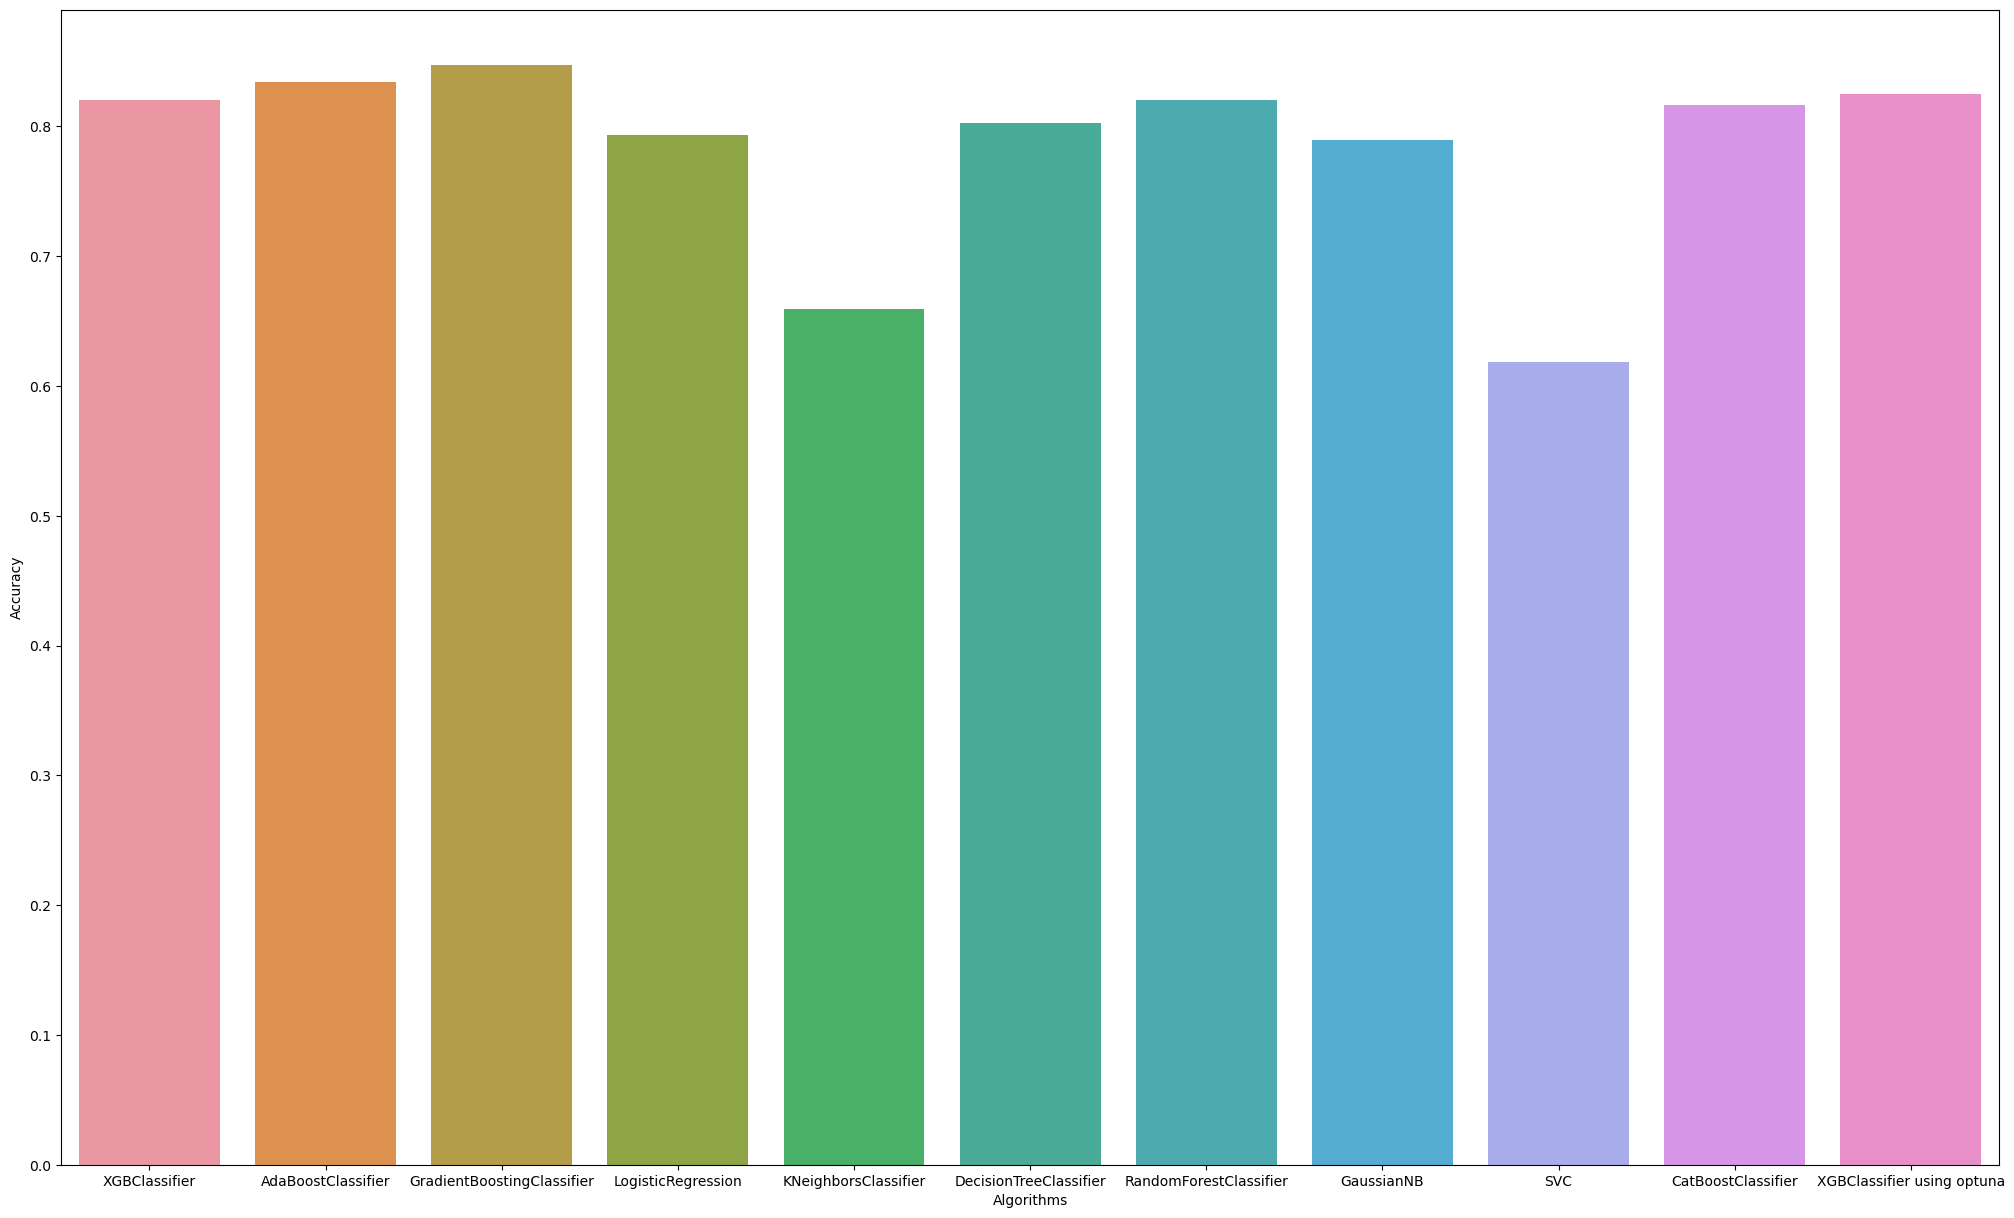

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
sns.barplot(x=output['Algorithms'],y=output['Accuracy'])

**converting it into csv file format**

In [89]:
output.to_csv()

',Algorithms,Accuracy\n1,XGBClassifier,0.820627802690583\n2,AdaBoostClassifier,0.8340807174887892\n3,GradientBoostingClassifier,0.8475336322869955\n4,LogisticRegression,0.7937219730941704\n5,KNeighborsClassifier,0.6591928251121076\n6,DecisionTreeClassifier,0.8026905829596412\n7,RandomForestClassifier,0.820627802690583\n8,GaussianNB,0.7892376681614349\n9,SVC,0.6188340807174888\n10,CatBoostClassifier,0.8161434977578476\n11,XGBClassifier using optuna,0.8251121076233184\n'

In [90]:
output

,Algorithms,Accuracy
1,XGBClassifier,0.820628
2,AdaBoostClassifier,0.834081
3,GradientBoostingClassifier,0.847534
4,LogisticRegression,0.793722
5,KNeighborsClassifier,0.659193
6,DecisionTreeClassifier,0.802691
7,RandomForestClassifier,0.820628
8,GaussianNB,0.789238
9,SVC,0.618834
10,CatBoostClassifier,0.816143


**CROSS VALIDATION OF XGB,GRADIENTBOOST,KNN,RANDOMFOREST,GAUSSIANNB,SVC MODELS**

In [91]:
print("Average Cross Validation score of XGB: {}".format(scores.mean()))
print("Average Cross Validation score of gradientboost:{}".format(score1.mean()))
print("Average Cross Validation score of KNN:{}".format(score4.mean()))
print("Average Cross Validation score of RandomForest:{}".format(score3.mean()))
print("Average Cross Validation score of GaussianNB :{}".format(score2.mean()))
print("Average Cross Validation score of SVC:{}".format(score7.mean()))

Average Cross Validation score of XGB: 0.7949051733812141
Average Cross Validation score of gradientboost:0.8024127482886321
Average Cross Validation score of KNN:0.630164964650432
Average Cross Validation score of RandomForest:0.8144316013915385
Average Cross Validation score of GaussianNB :0.7918527662439682
Average Cross Validation score of SVC:0.6481651890921333
